## Tarea #9.2
## FIS1344 - Métodos númericos y probabilidades
## Marcos Ausgusto Elgueta Salas

Use el método compuesto de Simpson y el método compuesto del trapecio para encontrar la siguiente integral

$$
\int_0^4 \frac{dx}{\sqrt{x^2 + 16}}
$$

Compare con el resultado exacto para obtener el error cometido. Grafique el error en función de $h$ para ambos métodos y compare con las fórmulas de error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Fórmula compuesta del trapecio:**
$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right]- \frac{h^2 (b-a)}{12}f''(\mu)
$$

Por lo que para mi integral:
$$
a=0, b=4, f(x)=1/((x^2)+16)^{0.5}, 
$$
con
$$
n= 10, h=(b-a)/n=(4/10)=2/5 
$$

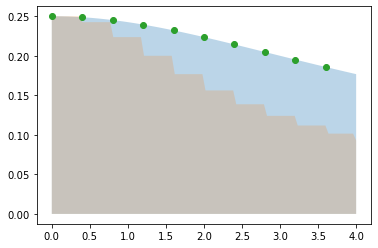

In [22]:
x = np.linspace(0,4,100)
plt.fill_between(x, (1/((((x)**2)+16)**0.5)), alpha = 0.3)

h = 2/5
def poly(x):
    ind = int(x/h)
    return (1/((((ind)**2)+16)**0.5))
plt.fill_between(x, [poly(xi) for xi in x], alpha = 0.2)

xp = np.arange(10)*h
plt.scatter(xp, (1/((((xp)**2)+16)**0.5)))

In [59]:
def trapecio(f, a, b, n):
    h = (b - a)/n
    fx = f(np.linspace(a+h, b-h, n-1, endpoint=True))
    return (h/2)*(f(a) + 2*sum(fx) + f(b))
def f(x):
    return (1/((((x)**2)+16)**0.5))

In [63]:
trapecio(f, 0, 4, 10)

0.8810789225522291

El error:

[ 8.33333333e-04  8.32950801e-04  8.31804178e-04  8.29896385e-04
  8.27232274e-04  8.23818603e-04  8.19664003e-04  8.14778936e-04
  8.09175643e-04  8.02868084e-04  7.95871872e-04  7.88204196e-04
  7.79883740e-04  7.70930596e-04  7.61366170e-04  7.51213085e-04
  7.40495077e-04  7.29236891e-04  7.17464175e-04  7.05203367e-04
  6.92481588e-04  6.79326526e-04  6.65766331e-04  6.51829501e-04
  6.37544778e-04  6.22941039e-04  6.08047193e-04  5.92892086e-04
  5.77504400e-04  5.61912564e-04  5.46144668e-04  5.30228380e-04
  5.14190868e-04  4.98058731e-04  4.81857934e-04  4.65613743e-04
  4.49350675e-04  4.33092448e-04  4.16861940e-04  4.00681147e-04
  3.84571155e-04  3.68552114e-04  3.52643215e-04  3.36862676e-04
  3.21227728e-04  3.05754613e-04  2.90458578e-04  2.75353879e-04
  2.60453787e-04  2.45770596e-04  2.31315640e-04  2.17099303e-04
  2.03131044e-04  1.89419413e-04  1.75972076e-04  1.62795844e-04
  1.49896693e-04  1.37279798e-04  1.24949562e-04  1.12909645e-04
  1.01162993e-04  8.97118

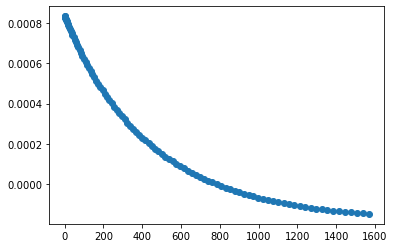

In [82]:
e = (-(h**2)/3)*(3*x**2/((x**2 + 16)**(5/2))-(1/((x**2 + 16)**(3/2))))
print(e)
h = np.arange(100)*h
plt.scatter(h**2,e)

**Fórmula compuesta de Simpson**: Se deduce de manera análoga


$$
\int_a^b dx\,f(x) = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + f(b)\right]- \frac{h^4 (b-a)}{180}f''(\mu)
$$

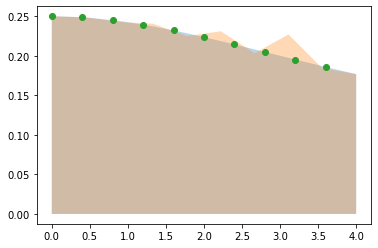

In [259]:
x = np.linspace(0,4,10)
plt.fill_between(x, (1/((((x)**2)+16)**0.5)), alpha = 0.3)

h = 2/5
def poly(x):
    ind = int(x/(2*h))
    Lo = (x - h*(2*ind+1))*(x - h*(2*ind+2))/(2*h*h)
    L1 = -(x - h*(2*ind))*(x - h*(2*ind+2))/(h*h)
    L2 = (x - h*(2*ind))*(x - h*(2*ind+1))/(2*h*h)
    return (1/(((2*h*ind)**2)+16)**0.5)*Lo + (1/((((h*(2*ind+1)))**2)+16)**0.5)*L1 + (1/((((h*(h*(2*ind+2)))**2)+16)**0.5))*L2
plt.fill_between(x, [poly(xi) for xi in x], alpha = 0.3)

xp = np.arange(10)*h
plt.scatter(xp, (1/((((xp)**2)+16)**0.5)))

In [347]:
def simpson(f,a,b,n):
        h = (b - a)/n
        fx = f(np.linspace(a+h, b-h, n-1, endpoint=True))
        return (h/3)*(f(a) + 2*sum(2*fx+1) + 4*sum(2*fx-1) + f(b))
def f(x):
    return (1/((((x)**2)+16)**0.5))

In [348]:
simpson(f, 0, 4, 100)

0.8570307832639769

In [346]:
e = (-(h**4)/45)*(3*x**2/((x**2 + 16)**(5/2))-(1)/((x**2 + 16)**(3/2)))
print(e)
h = np.arange(100)*h
plt.scatter(h**4, e)

ValueError: operands could not be broadcast together with shapes (100,) (10,) 

# Calificación: 5.5

Se calculó la integral con el método del trapecio y de Simpson. Sin embargo no se comparó con la solución exacta para obtener el error, como se pedía.